In [1]:
######################
# librairies de base #
######################

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from OutilsP6 import *
import warnings
import pickle
import time
import logging as loggingAA
import PIL
import os

###############
# Tensor Flow #
###############

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text
from keras.applications.vgg16 import VGG16
import tensorflow.keras
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

##################
# SciKit - Learn #
##################

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn. metrics import adjusted_rand_score
from sklearn import cluster, metrics
from sklearn import manifold, decomposition

##########################################
# librairies pour le traitement de texte #
##########################################
import gensim
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim

# Autres
import transformers
from transformers import *
import cv2

2022-11-24 18:10:59.263006: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-24 18:10:59.376317: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-24 18:10:59.376345: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-24 18:10:59.399663: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-24 18:11:00.003312: W tensorflow/stream_executor/platform/de

In [2]:
# On ingnorera les warning concernant les prochaines versions
def warn(*args, **kwargs):
    pass
warnings.warn = warn
# disable WARNING, INFO and DEBUG logging everywhere
loggingAA.disable(logging.WARNING)

### <font color = 'green'> Import des datas </font>

In [3]:
image_dir = "dataset/Flipkart/Images/"
data_dir = "dataset/Flipkart/flipkart_com-ecommerce_sample_1050.csv"
DF = pd.read_csv(data_dir)

# <font color = 'red'> __I - Exploration__ </font>

## <font color = 'green'> I/A - Présentation </font>

Il y a 341 valeurs manquantes sur 15750 valeurs totales.
Le taux de remplissage est de : 97.83 %
Dimension du dataframe : (1050, 15)


,count,dtype,primary_key,nb_of_NaN,%_of_NaN,n_unique,unique_most_freq,num_mean,num_median,num_min,num_max,num_std,nb_True,%_True
uniq_id,1050,object,True,0,0.00,1050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
crawl_timestamp,1050,object,False,0,0.00,149,2015-12-01 12:40:44 +0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_url,1050,object,True,0,0.00,1050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_name,1050,object,True,0,0.00,1050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_category_tree,1050,object,False,0,0.00,642,"[""Home Furnishing >> Bed Linen >> Blankets, Qu...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
pid,1050,object,True,0,0.00,1050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retail_price,1049,float64,False,1,0.10,354,999.0,2186.197331,999.0,35.0,201000.0,7639.229411,NaN,NaN
discounted_price,1049,float64,False,1,0.10,424,199.0,1584.527169,600.0,35.0,201000.0,7475.099680,NaN,NaN
image,1050,object,True,0,0.00,1050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_FK_Advantage_product,1050,bool,False,0,0.00,2,False,NaN,NaN,NaN,NaN,NaN,57.0,0.05


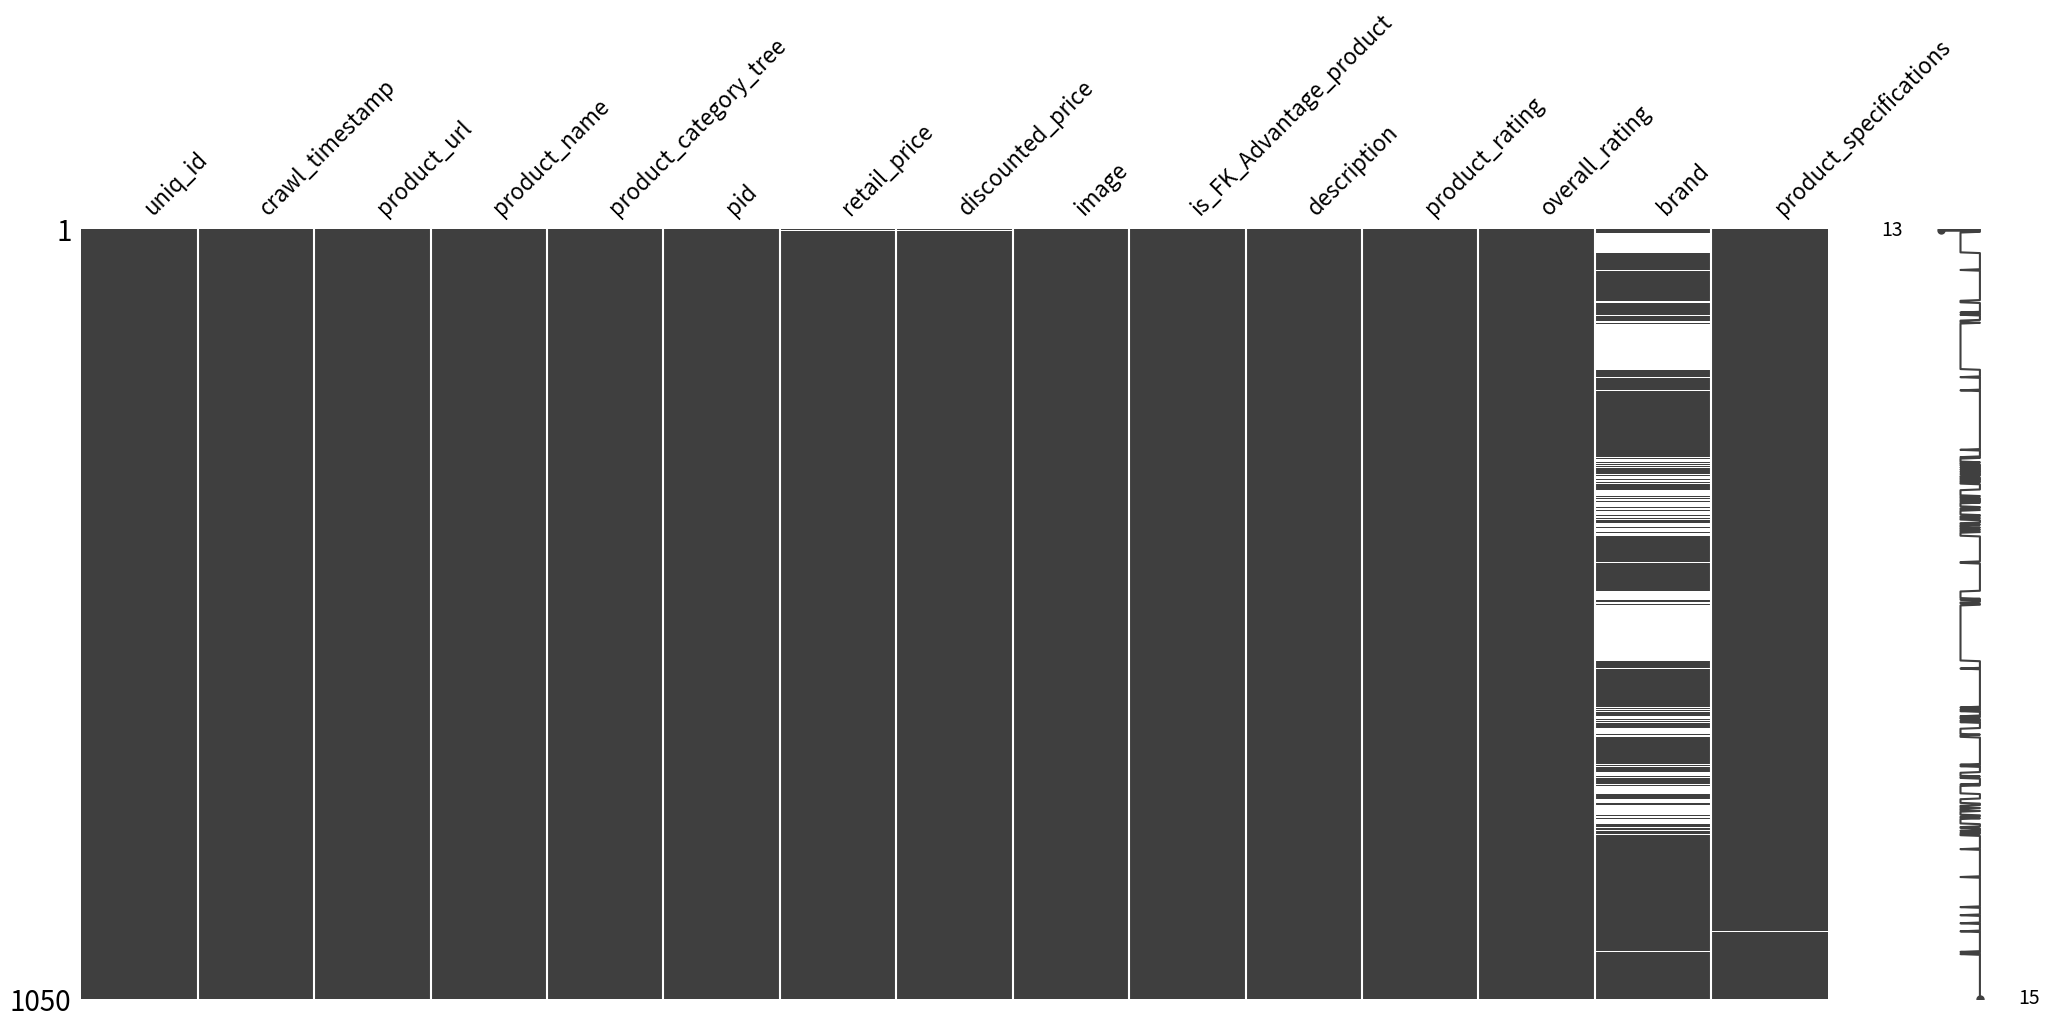

In [4]:
dataFrameInfos(DF)

__Description des variable du Dataframe :__
- uniq_id : hash code, identifiant du produit, clé primaire
- crawl_timestamp :
- product_url : string (url), url de la fiche produit
- product_category_tree : string, arborescence des catégories du produit
- pid : id, clé primaire
- retail_price : float, prix au détail du produit
- discounted price : float, prix réduit du produit
- image : hash code, identifiant de l'image associée au produit, clé primaire
- is_FK_Advantage_product : Booléen, produit dans le programme avantage de Flipkart
- description : string, description du produit, clé primaire
- product_rating : string ou float, note du produit
- overall_rating : string ou float, note du produit
- brand : string, marque du produit
- product_specifications : string

## <font color = 'green'> I/B - Création de variables, récupération de la variable cible. </font>

In [5]:
def lenList7(L) :
    return L + [np.nan for i in range(7-len(L))]

for e in DF.index :
    splitted_list = DF.loc[e,'product_category_tree'][2:-2].split(' >> ')
    splitted_list = lenList7(splitted_list)
    for k in range(len(splitted_list)) :
        DF.loc[e,f'product_category_tree_{k+1}'] = splitted_list[k]

In [6]:
DF.loc[:,['product_category_tree','product_category_tree_1','product_category_tree_2','product_category_tree_3','product_category_tree_4','product_category_tree_5','product_category_tree_6','product_category_tree_7']]

,product_category_tree,product_category_tree_1,product_category_tree_2,product_category_tree_3,product_category_tree_4,product_category_tree_5,product_category_tree_6,product_category_tree_7
0,"[""Home Furnishing >> Curtains & Accessories >>...",Home Furnishing,Curtains & Accessories,Curtains,Elegance Polyester Multicolor Abstract Eyelet ...,NaN,NaN,NaN
1,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Baby Care,Baby Bath & Skin,Baby Bath Towels,Sathiyas Baby Bath Towels,"Sathiyas Cotton Bath Towel (3 Bath Towel, Red,...",NaN,NaN
2,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Baby Care,Baby Bath & Skin,Baby Bath Towels,Eurospa Baby Bath Towels,Eurospa Cotton Terry Face Towel Set (20 PIECE ...,NaN,NaN
3,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",Home Furnishing,Bed Linen,Bedsheets,SANTOSH ROYAL FASHION Bedsheets,SANTOSH ROYAL FASHION Cotton Printed King size...,NaN,NaN
4,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",Home Furnishing,Bed Linen,Bedsheets,Jaipur Print Bedsheets,Jaipur Print Cotton Floral King sized Double B...,NaN,NaN
...,...,...,...,...,...,...,...,...
1045,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Baby Care,Baby & Kids Gifts,Stickers,Oren Empower Stickers,NaN,NaN,NaN
1046,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Baby Care,Baby & Kids Gifts,Stickers,Wallmantra Stickers,NaN,NaN,NaN
1047,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Baby Care,Baby & Kids Gifts,Stickers,Uberlyfe Stickers,NaN,NaN,NaN
1048,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Baby Care,Baby & Kids Gifts,Stickers,Wallmantra Stickers,NaN,NaN,NaN


## <font color = 'green'> I/C - Graphiques d'exploration </font>

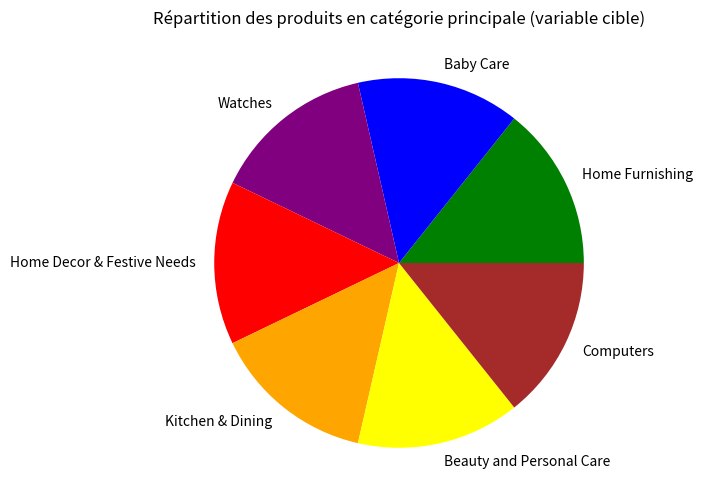

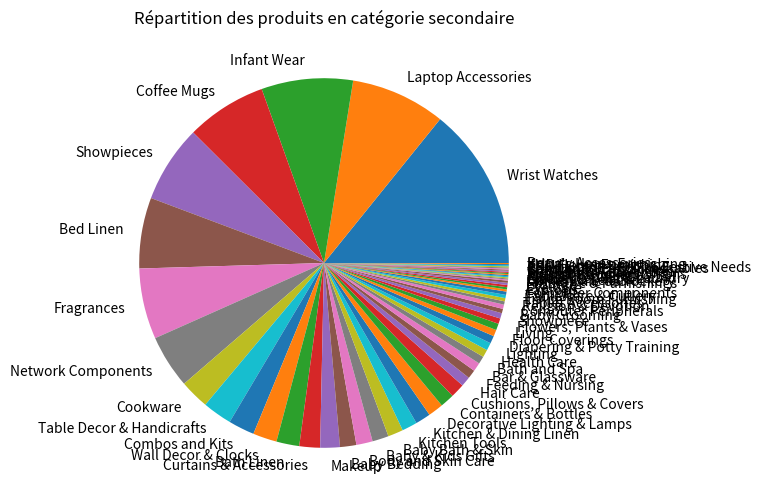

In [7]:
values = DF['product_category_tree_1'].value_counts()

plt.figure(figsize = (6,6))
plt.pie(values, labels = values.index, colors = ['green','blue','purple','red','orange','yellow','brown'])
plt.title('Répartition des produits en catégorie principale (variable cible)')
plt.show()
plt.figure(figsize = (6,6))
values = DF['product_category_tree_2'].value_counts()
plt.pie(values, labels = values.index)
plt.title('Répartition des produits en catégorie secondaire')
plt.show()

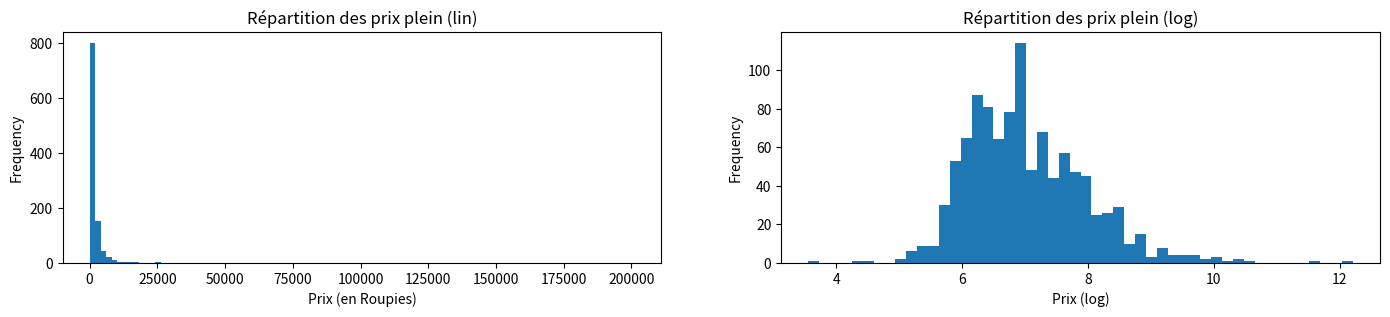

In [8]:
plt.subplot(1,2,1)
DF['retail_price'].plot.hist(bins = 100, figsize = (17,3))
plt.title("Répartition des prix plein (lin)")
plt.xlabel('Prix (en Roupies)')
plt.subplot(1,2,2)
np.log(DF['retail_price']).plot.hist(bins = 50, figsize = (17,3))
plt.title("Répartition des prix plein (log)")
plt.xlabel('Prix (log)')
plt.show()

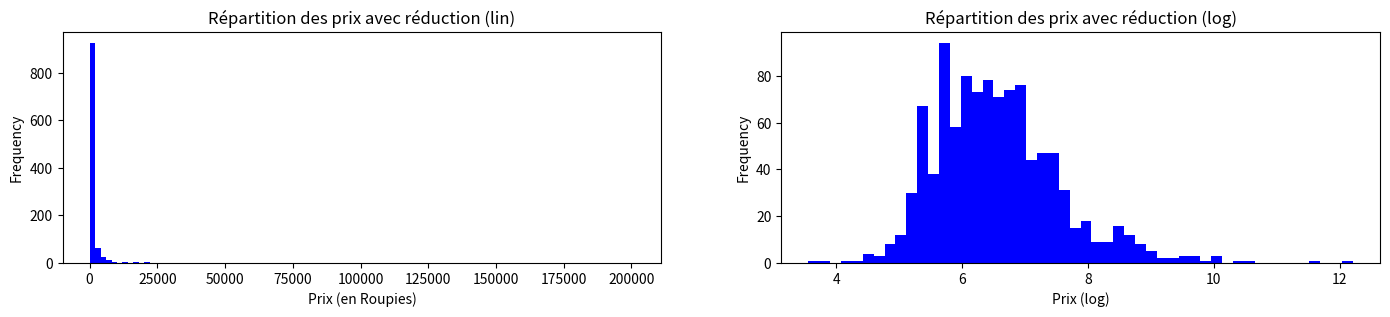

In [9]:
plt.subplot(1,2,1)
DF['discounted_price'].plot.hist(bins = 100, figsize = (17,3), color = 'blue')
plt.title("Répartition des prix avec réduction (lin)")
plt.xlabel('Prix (en Roupies)')
plt.subplot(1,2,2)
np.log(DF['discounted_price']).plot.hist(bins = 50, figsize = (17,3), color = 'blue')
plt.title("Répartition des prix avec réduction (log)")
plt.xlabel('Prix (log)')
plt.show()

Text(0.5, 1.0, 'Répartion du nombre de produits avantage-Flipkart')

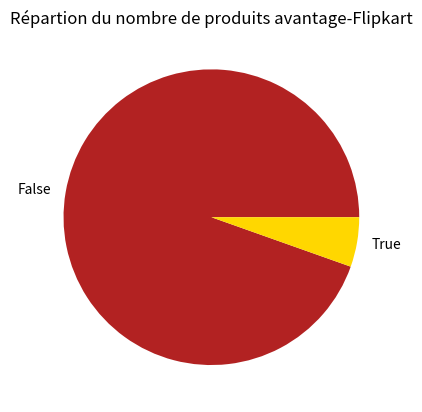

In [10]:
DF['is_FK_Advantage_product'].value_counts().plot.pie(colors = ['firebrick','gold'])
plt.ylabel('')
plt.title('Répartion du nombre de produits avantage-Flipkart')

# __PARTIE 1 : Traitement du texte__

* Ce notebook présente différentes techniques de "Sentence Embeddings", permettant de générer des features à partir de phrases (ici des description des produits)
* L'objectif est de pouvoir séparer les produits de façon automatique, via un T-SNE, qui permet une réduction des features en 2 dimensions

### Récupération du dataset

In [11]:
path = "dataset/Flipkart/"
data_T = DF
del DF
print(data_T.shape)

(1050, 22)


### Nettoyage du texte / préparation des variables d'entrée.

In [12]:
def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ').replace('_', ' ').replace(':',' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
from nltk.corpus import stopwords
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')','Flipkart','flipkart']
stop_wdl = ['product', 'free', 'buy', 'delivery', 'cash', 'shipping', 'price']
#['product', 'free', 'buy', 'delivery', 'cash', 'shipping', 'price']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

def stop_word_filter_fctdl(list_words) :
    filtered_w = [w for w in list_words if not w in stop_wdl]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fctdl(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

data_T['sentence_bow'] = data_T['description'].apply(lambda x : transform_bow_fct(x))
data_T['sentence_bow_lem'] = data_T['description'].apply(lambda x : transform_bow_lem_fct(x))
data_T['sentence_dl'] = data_T['description'].apply(lambda x : transform_dl_fct(x))
data_T.to_csv("data_flipkart.csv")
data_T.shape

(1050, 25)

In [13]:
data_T['length_bow'] = data_T['sentence_bow'].apply(lambda x : len(word_tokenize(x)))
print("max length bow : ", data_T['length_bow'].max())
data_T['length_dl'] = data_T['sentence_dl'].apply(lambda x : len(word_tokenize(x)))
print("max length dl : ", data_T['length_dl'].max())

max length bow :  379
max length dl :  634


### Prépartaion de la variable cible

In [14]:
def lenList7(L) :
    return L + [np.nan for i in range(7-len(L))]

for e in data_T.index :
    splitted_list = data_T.loc[e,'product_category_tree'][2:-2].split(' >> ')
    splitted_list = lenList7(splitted_list)
    for k in range(len(splitted_list)) :
        data_T.loc[e,f'product_category_tree_{k+1}'] = splitted_list[k]

In [15]:
l_cat = list(set(data_T['product_category_tree_1']))
print("catégories : ", l_cat)
y_cat_num = [(1-l_cat.index(data_T.iloc[i]['product_category_tree_1'])) for i in range(len(data_T))]

catégories :  ['Computers', 'Home Decor & Festive Needs', 'Watches', 'Home Furnishing', 'Kitchen & Dining', 'Beauty and Personal Care', 'Baby Care']


### Fonctions communes TSNE

In [16]:
# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features) :
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=22, n_iter=4000, 
                                 init='random', learning_rate=180, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation des produits par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des produits par clusters')
    
    plt.show()
    print("ARI : ", ARI)

### Mots très fréquents

In [17]:
cvect = CountVectorizer(stop_words='english')
feat = 'sentence_bow_lem'
cv_fit = pd.DataFrame(cvect.fit_transform(data_T[feat]).toarray())

dic = cvect.vocabulary_
L = [None for i in range(len(dic))]
for key in dic.keys() :
    num = dic[key]
    L[num] = key
cv_fit.columns = L
del L, num, dic
cv_fit.sum().sort_values(ascending = False)[:12]

product        864
free           618
buy            581
delivery       567
cash           564
genuine        564
shipping       564
replacement    559
price          558
day            553
flipkart       474
com            473
dtype: int64

<br><br><br>

# <font color = 'red'> __I - Bag of word & Tf-idf__ </font>

## Préparation sentences

In [18]:
# création du bag of words (CountVectorizer et Tf-idf)
cvect = CountVectorizer(stop_words='english', max_df=0.9, min_df=1)
ctf = TfidfVectorizer(stop_words=stop_w, max_df=0.55, min_df=4)

feat = 'sentence_bow_lem'
cv_fit = cvect.fit(data_T[feat])
ctf_fit = ctf.fit(data_T[feat])

cv_transform = cvect.transform(data_T[feat])  
ctf_transform = ctf.transform(data_T[feat])  

## Exécution des modèles

In [19]:
print("CountVectorizer : ")
print("-----------------")
_ARI, _X_tsne, _labels = ARI_fct(cv_transform)
print()
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(ctf_transform)

CountVectorizer : 
-----------------
ARI :  0.4467 time :  8.0

Tf-idf : 
--------
ARI :  0.5674 time :  7.0


## Graphiques

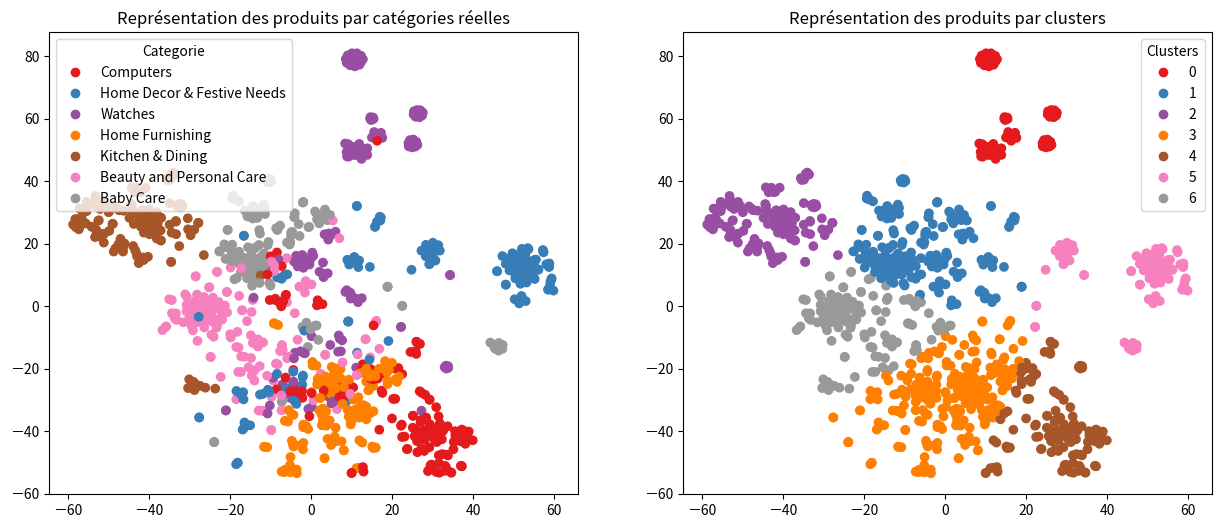

ARI :  0.4467


In [20]:
TSNE_visu_fct(_X_tsne, y_cat_num, _labels, _ARI)

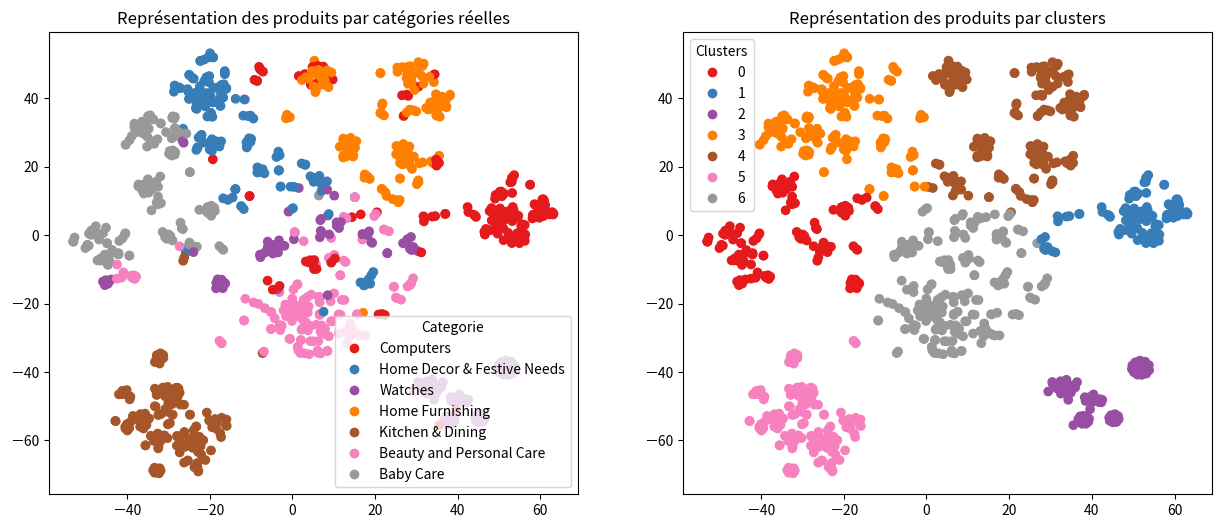

ARI :  0.5674


In [21]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [22]:
# Libération de mémoire
del cvect, ctf, cv_fit, ctf_fit, ARI, X_tsne, labels, _ARI, _X_tsne, _labels

<br><br><br>

# <font color = 'red'> __II - Word2Vec__ </font>

### <font color = 'green'> II/A - Création du modèle Word2Vec </font>

In [23]:
w2v_size=10
w2v_window=2
w2v_min_count=7
w2v_epochs=200
maxlen = 600 # adapt to length of sentences
sentences = data_T['sentence_dl'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [24]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 1267
Word2Vec trained


In [25]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 5189


### <font color = 'green'> II/B - Création de la matrice d'embedding </font>

In [26]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  0.2442
Embedding matrix: (5189, 10)


### <font color = 'green'> II/B - Création du modèle d'embedding </font>

In [27]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 600)]             0         
                                                                 
 embedding (Embedding)       (None, 600, 10)           51890     
                                                                 
 global_average_pooling1d (G  (None, 10)               0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 51,890
Trainable params: 51,890
Non-trainable params: 0
_________________________________________________________________


2022-11-24 18:11:31.777221: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /root/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-11-24 18:11:31.777274: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-24 18:11:31.777299: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (b5cca19a4d14): /proc/driver/nvidia/version does not exist
2022-11-24 18:11:31.777482: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### <font color = 'green'> II/B - Exécution du modèle </font>

In [28]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 0s 1ms/step


(1050, 10)

In [29]:
ARI, X_tsne, labels = ARI_fct(embeddings)

ARI :  0.3043 time :  8.0


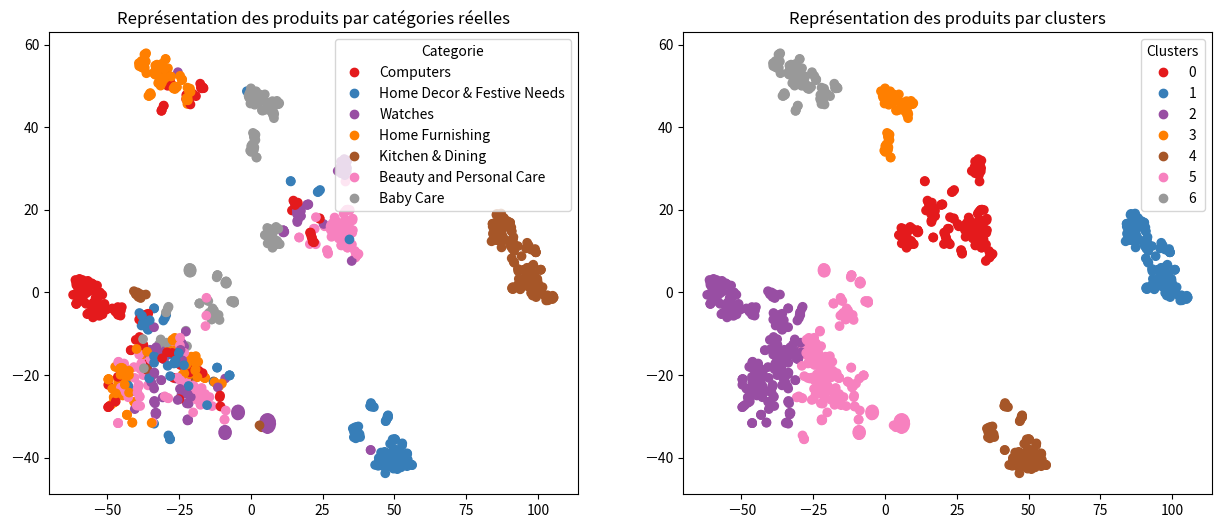

ARI :  0.3043


In [30]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [31]:
# Libération de mémoire :
del embeddings, embed_model, embedding_matrix, word_rate, word_index
del tokenizer, x_sentences, model_vectors, vocab_size, num_words
del w2v_model, w2v_words, w2v_size, w2v_window, w2v_min_count
del w2v_epochs, maxlen, ARI, X_tsne, labels

<br><br><br>

# <font color = 'red'> __III - BERT__ (bert-base-uncased)</font>

In [32]:
os.environ["TF_KERAS"]='1'
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.10.0
2.10.0
Num GPUs Available:  0
True


### <font color = 'green'> Fonctions communes (BERT) </font>

In [20]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            print("step 0 done")
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

### <font color = 'green'> III/A - BERT HuggingFace </font>

In [84]:
max_length = 32
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = data_T['sentence_dl'].to_list()

In [85]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

1/1 [==============================] - 2s 2s/step
step 0 done
1/1 [==============================] - 0s 272ms/step
temps traitement :  36.0


ARI :  0.4806 time :  12.0


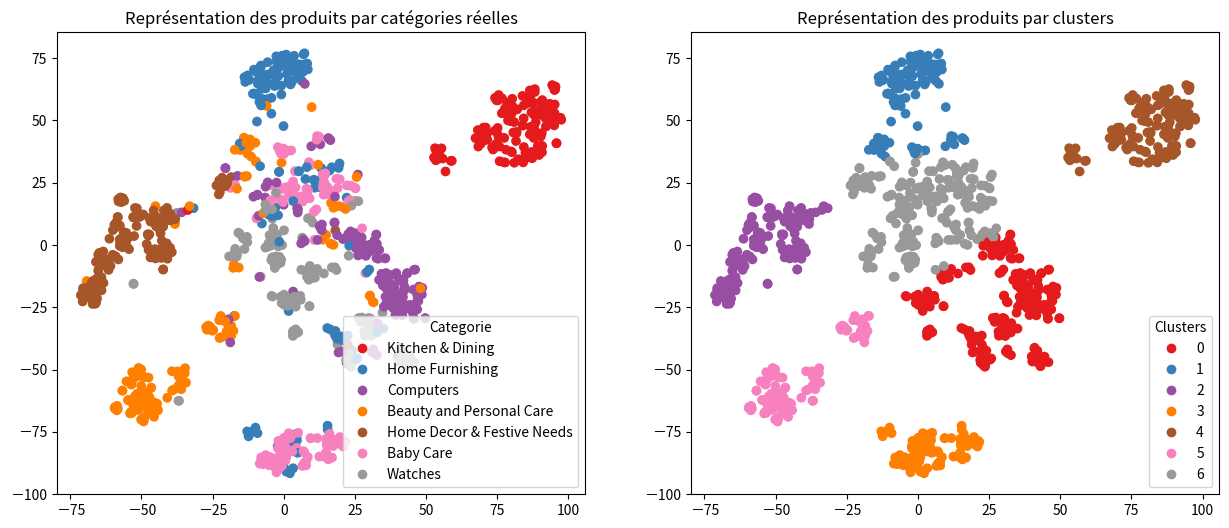

ARI :  0.4806


In [86]:
ARI, X_tsne, labels = ARI_fct(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

### <font color = 'green'> III/A - BERT hub Tensorflow </font>

In [21]:
# Guide sur le Tensorflow hub : https://www.tensorflow.org/text/tutorials/classify_text_with_bert
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

In [46]:
max_length = 31

batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer
sentences = data_T['sentence_dl'].to_list()
features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, max_length, batch_size, mode='TFhub')

step 0 done
temps traitement :  32.0


ARI :  0.4707 time :  8.0


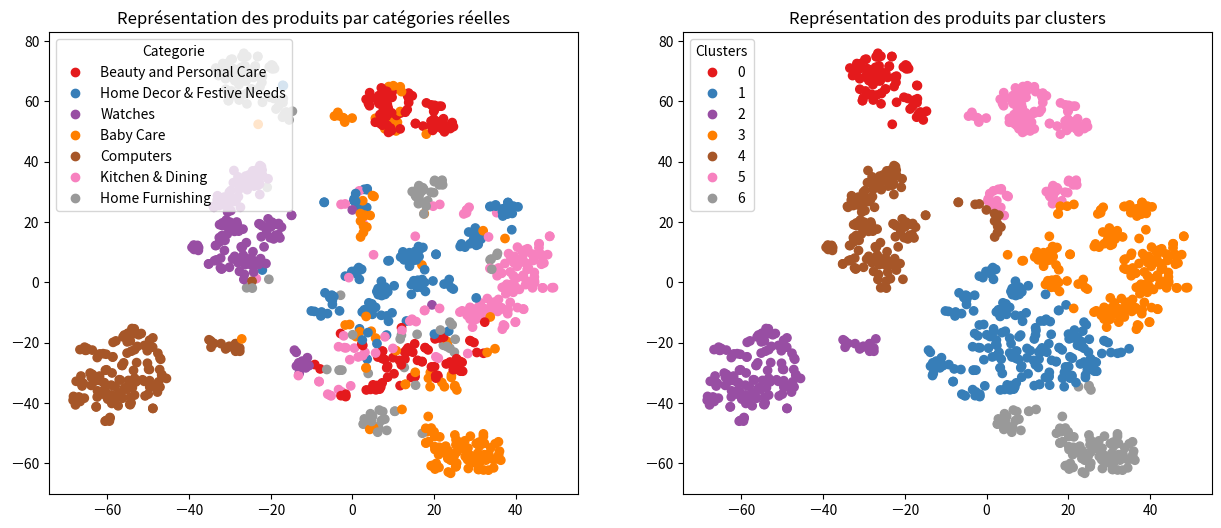

ARI :  0.4707


In [47]:
ARI, X_tsne, labels = ARI_fct(features_bert)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

<br><br>

# <font color = 'red'> __IV - Universal Sentence Encoder__ </font>

In [45]:
os.environ["TF_KERAS"]='1'
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.10.0
2.10.0
Num GPUs Available:  0
True


In [46]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [47]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [48]:
batch_size = 10
sentences = data_T['sentence_dl'].to_list()
features_USE = feature_USE_fct(sentences, batch_size)

ARI :  0.4548 time :  11.0


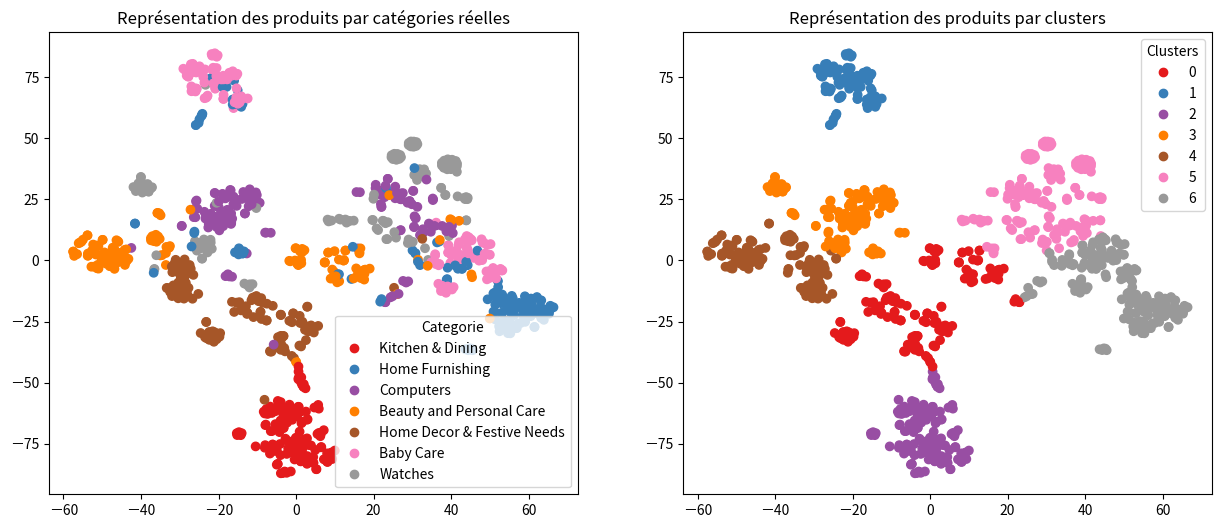

ARI :  0.4548


In [49]:
ARI, X_tsne, labels = ARI_fct(features_USE)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

<br><br><br><br><br>

# __PARTIE 2 : Traitement des images__

In [50]:
# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features) :
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=16, n_iter=6000, 
                                 init='random', learning_rate=230, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation des produits par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des produits par clusters')
    
    plt.show()
    print("ARI : ", ARI)


<br><br><br><br>

# <font color = 'red'> __V - SIFT__ </font>

In [ ]:
list_labels = ['Home Furnishing', 'Baby Care', 'Watches','Home Decor & Festive Needs',
               'Kitchen & Dining','Beauty and Personal Care', 'Computers']

# 150 produits par catégories, on va en drop 70 pour en garder 7*80 = 560
for e in list_labels :
  index_to_drop = np.random.choice(DF.loc[DF['product_category_tree_1'] == e,:].index, size = 70, replace = False)
  DF.drop(index_to_drop, inplace = True)
list_photos = DF['image'].to_list()

In [ ]:
label_name = "no_name "

def photo_class(photo) :
    for label in list_labels :
        if label in photo : 
            return label
    return label_name

data = pd.DataFrame()
data["image_path"] = DF['image']
data["label_name"] = DF['product_category_tree_1']
le = LabelEncoder()
data["label"] = le.fit_transform(data["label_name"])
data

,image_path,label_name,label
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care,0
3,d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing,4
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing,4
5,893aa5ed55f7cff2eccea7758d7a86bd.jpg,Watches,6
8,41384da51732c0b4df3de8f395714fbb.jpg,Watches,6
...,...,...,...
1035,d407ab825e1a266635214bfe893f29c4.jpg,Computers,2
1039,3b96a152c8fac4421fb67b6190584976.jpg,Home Decor & Festive Needs,3
1041,b1644f47c7dfa58f8c06677f2a27ee09.jpg,Baby Care,0
1047,5912e037d12774bb73a2048f35a00009.jpg,Baby Care,0


## Détermination et affichage des descripteurs SIFT

* L'image contient 319 descripteurs
* Chaque descripteur est un vecteur de longueur 128

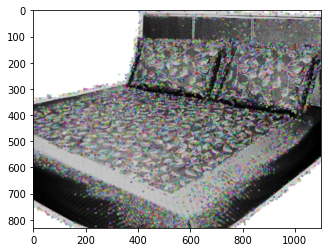

Descripteurs :  (11754, 128)

[[ 12.   8.   4. ...   0.   1.  26.]
 [  0.  14.  14. ...   0.   0.   0.]
 [  3.  79. 128. ...   0.   0.   0.]
 ...
 [ 11.   1.   1. ...  18.   0.   0.]
 [ 12.  99.   6. ...  46.   2.   1.]
 [ 41.  17.   0. ...   0.   1.  28.]]


In [ ]:
import cv2

sift = cv2.xfeatures2d.SIFT_create()
image = cv2.imread(image_path+list_photos[1],0) # convert in gray
image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)


# Pré-traitement des images via SIFT

## Créations des descripteurs de chaque image
* Pour chaque image passage en gris et equalisation
* création d'une liste de descripteurs par image ("sift_keypoints_by_img") qui sera utilisée pour réaliser les histogrammes par image
* création d'une liste de descripteurs pour l'ensemble des images ("sift_keypoints_all") qui sera utilisé pour créer les clusters de descripteurs

In [ ]:
# identification of key points and associated descriptors
import time, cv2
sift_keypoints = []
temps1=time.time()
sift = cv2.xfeatures2d.SIFT_create(300)

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(image_path+list_photos[image_num],0) # convert in gray
    # image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    res = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints)
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500

Nombre de descripteurs :  (167344, 128)
temps de traitement SIFT descriptor :           326.43 secondes


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


## Création des clusters de descripteurs
* Utilisation de MiniBatchKMeans pour obtenir des temps de traitement raisonnables

In [ ]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  409
Création de 409 clusters de descripteurs ...
temps de traitement kmeans :             4.28 secondes


## Création des features des images
* Pour chaque image : 
   - prédiction des numéros de cluster de chaque descripteur
   - création d'un histogramme = comptage pour chaque numéro de cluster du nombre de descripteurs de l'image

Features d'une image = Histogramme d'une image = Comptage pour une image du nombre de descripteurs par cluster

In [ ]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")


0
100
200
300
400
500
temps de création histogrammes :             1.22 secondes


## Réductions de dimension

### Réduction de dimension PCA
* La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (99%)
* L'impact est une meilleure séparation des données via le T-SNE et une réduction du temps de traitement du T-SNE

In [ ]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (560, 409)
Dimensions dataset après réduction PCA :  (560, 280)


### Réduction de dimension T-SNE
* Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

In [ ]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data["label_name"]
print(df_tsne.shape)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(560, 3)


## Analyse visuelle : affichage T-SNE selon catégories d'images
* Les catégories "cloudy" et "rain" sont partiellement séparées

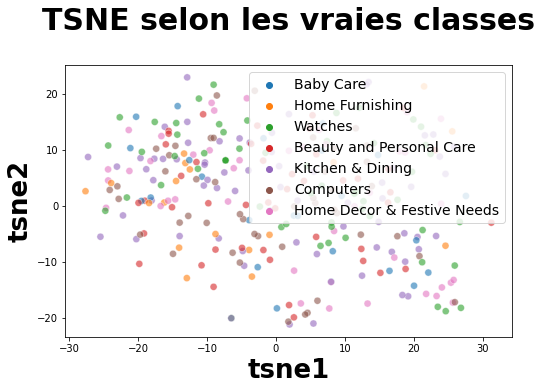

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()


## Analyse mesures : similarité entre catégories et clusters

###  Création de clusters à partir du T-SNE

In [ ]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)


(560, 4)


###  Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters
* Le score ARI de 0.15 reste faible

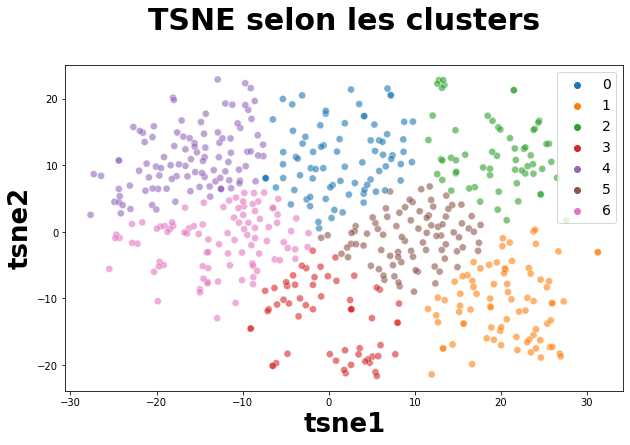

ARI :  0.032656898619696416


In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = data["label"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

### Analyse par classes
* La matrice de confusion doit être transformée pour mettre avoir en colonne le même ordre des catégories supposées qu'en ligne
* Cette transformation atteint ses limites pour les 2 catégories "shine" et "sunshine" qui sont peu séparées (donc elle a été réalisée manuellement au lieu d'utiliser la fonction "argmax")

In [ ]:
df_tsne.groupby("cluster").count()["class"]

cluster
0    42
1    38
2    30
3    34
4    62
5    44
6    49
Name: class, dtype: int64

In [ ]:
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

[[ 9  5  7  7 17 26  9]
 [13 10 21 14  5  5 12]
 [ 8 27  7  6 18  4 10]
 [ 7  5  5  9 20 12 22]
 [ 9 11  3 14 10 20 13]
 [17 12  6  3 18  2 22]
 [17 11 12  6 14 15  5]]


In [ ]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    # corresp = np.argmax(conf_mat, axis=0)
    corresp = [6, 5, 4, 3, 1, 2, 0]
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

cls_labels_transform = conf_mat_transform(labels, cls.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels, cls_labels_transform))

Correspondance des clusters :  [6, 5, 4, 3, 1, 2, 0]
[[ 9 17 26  7  7  5  9]
 [12  5  5 14 21 10 13]
 [10 18  4  6  7 27  8]
 [22 20 12  9  5  5  7]
 [13 10 20 14  3 11  9]
 [22 18  2  3  6 12 17]
 [ 5 14 15  6 12 11 17]]

              precision    recall  f1-score   support

           0       0.10      0.11      0.10        80
           1       0.05      0.06      0.05        80
           2       0.05      0.05      0.05        80
           3       0.15      0.11      0.13        80
           4       0.05      0.04      0.04        80
           5       0.15      0.15      0.15        80
           6       0.21      0.21      0.21        80

    accuracy                           0.11       560
   macro avg       0.11      0.11      0.11       560
weighted avg       0.11      0.11      0.11       560



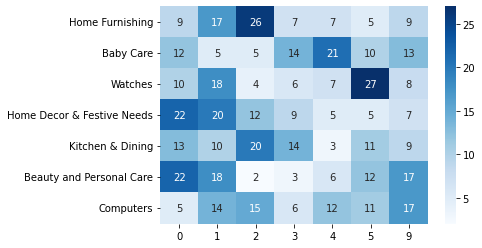

In [ ]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

<br><br><br><br>

# <font color = 'red'> __VI - Transfert Learning__ </font>

In [64]:
DF = data_T
# Récupération des images
image_shape = (224,224)
X_data, Y_data = [],[]
data_size = 1050
encoder = LabelEncoder()

for i in range(data_size) :
    image_path = image_dir + DF.loc[i,'image']
    img = cv2.imread(image_path)
    resized_img = cv2.resize(img, image_shape)
    X_data.append(resized_img)
Y_data = DF.loc[:data_size, 'product_category_tree_1'].to_numpy()
Y_data = encoder.fit_transform(Y_data)
VGG_data = np.array(X_data)
del img, resized_img, image_path

### <font color = 'green'> VI/A - Vgg16 </font>

In [49]:
modelVGG = VGG16()
image_data = modelVGG.predict(VGG_data)
print(image_data.shape)

33/33 [==============================] - 58s 2s/step
(1050, 1000)


ARI :  0.3052 time :  9.0


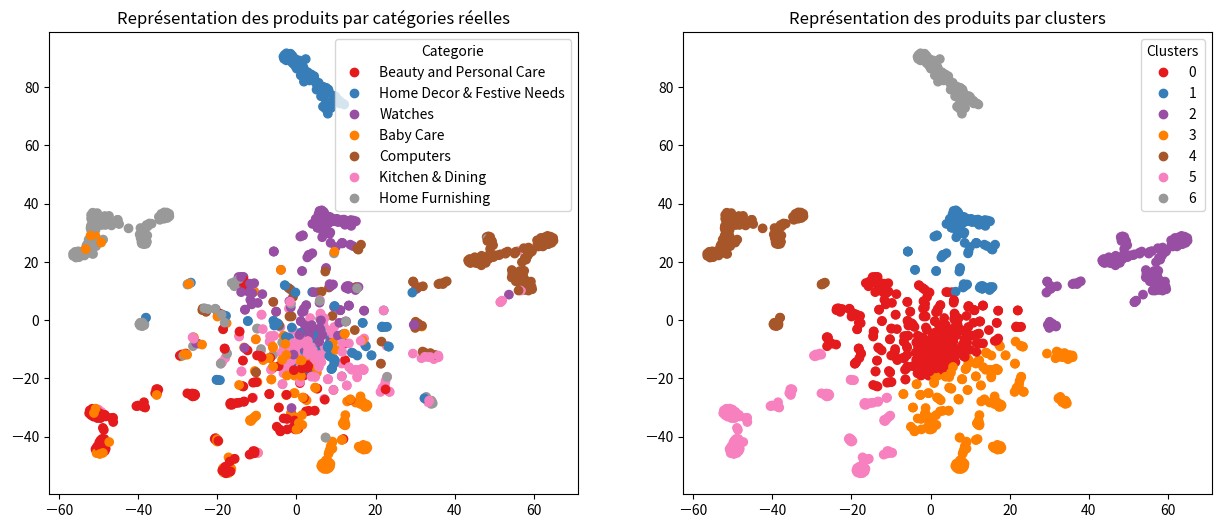

ARI :  0.3052


In [50]:
l_cat = list(set(DF['product_category_tree_1']))
y_cat_num = [(1-l_cat.index(DF.iloc[i]['product_category_tree_1'])) for i in range(len(DF))]
ARI, X_tsne, labels = ARI_fct(image_data)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [ ]:
del VGG_data

### <font color = 'green'> VI/B - Mobilenet </font>

In [65]:
features_extractor_url = 'http://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model = hub.KerasLayer(features_extractor_url, input_shape = (224,224,3), trainable = False)

In [66]:
# Elimination du bruit :
for i in range (data_size) :
    X_data[i] = cv2.medianBlur(X_data[i], 3, cv2.BORDER_DEFAULT)
# Standardisation :
X_data = np.array(X_data)
X_data = X_data/255

In [67]:
model = tf.keras.Sequential([pretrained_model])
image_data = model.predict(X_data)
print(image_data.shape)

33/33 [==============================] - 16s 446ms/step
(1050, 1280)


ARI :  0.524 time :  7.0


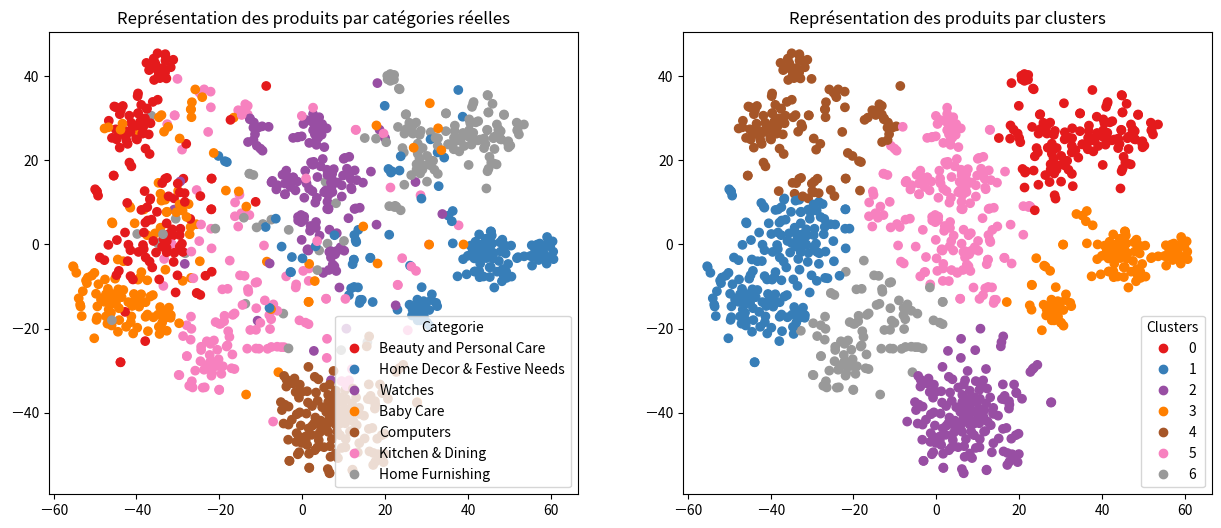

ARI :  0.524


In [68]:
l_cat = list(set(DF['product_category_tree_1']))
y_cat_num = [(1-l_cat.index(DF.iloc[i]['product_category_tree_1'])) for i in range(len(DF))]

ARI, X_tsne, labels = ARI_fct(image_data)
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)